In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
data = {
    'Arts & culture': [20, 25, 28, 42, 30, 43],
    'Education': [73, 80, 74, 70, 63, 60],
    'Health': [67, 53, 61, 65, 70, 75],
    'Human services': [60, 85, 78, 60, 58, 55],
    'Other': [53, 30, 45, 30, 45, 30]
}
years = [2020, 2021, 2022, 2023, 2024, 2025]
df = pd.DataFrame(data, index=years)

In [8]:
df

,Arts & culture,Education,Health,Human services,Other
2020,20,73,67,60,53
2021,25,80,53,85,30
2022,28,74,61,78,45
2023,42,70,65,60,30
2024,30,63,70,58,45
2025,43,60,75,55,30


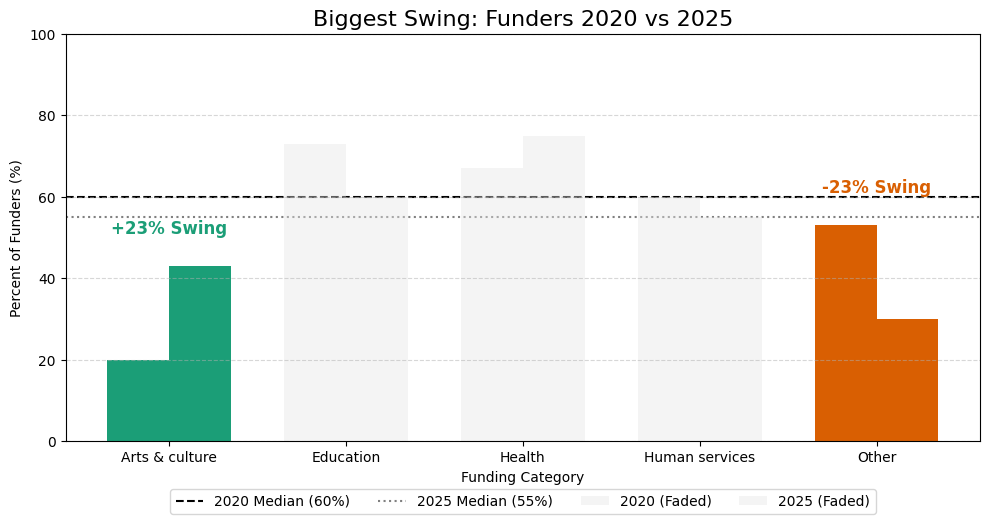

In [40]:
df_plot = df.loc[[2020, 2025]].T
categories = df_plot.index
x = np.arange(len(categories))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

highlight_categories = ['Arts & culture', 'Other']
#highlight_color = {'Arts & culture': '#0072B2', 'Other': '#D55E00'}
highlight_color = {'Arts & culture': '#1B9E77', 'Other': '#D95F02'}
#fade_color = '#CCCCCC'
fade_color = '#E5E5E5'
fade_alpha = 0.4

median_2020 = df.loc[2020].median()
median_2025 = df.loc[2025].median()

ax.axhline(median_2020, color='black', linestyle='--', linewidth=1.5, label=f'2020 Median ({median_2020:.0f}%)', zorder=0)
ax.axhline(median_2025, color='gray', linestyle=':', linewidth=1.5, label=f'2025 Median ({median_2025:.0f}%)', zorder=0)


rects2020 = ax.bar(x - width/2, df_plot[2020], width, label='2020', color=fade_color, alpha=fade_alpha)
rects2025 = ax.bar(x + width/2, df_plot[2025], width, label='2025', color=fade_color, alpha=fade_alpha)

text_y_position = max(start_val, end_val) + 5

for i, cat in enumerate(categories):
    start_val = df_plot.loc[cat, 2020]
    end_val = df_plot.loc[cat, 2025]
    net_change = end_val - start_val
    
    if cat in highlight_categories:
        color = highlight_color[cat]
        alpha = 1.0 
        
        ax.bar(x[i] - width/2, start_val, width, color=color, alpha=alpha)
        ax.bar(x[i] + width/2, end_val, width, color=color, alpha=alpha)
        
        callout_text = f'{net_change:+.0f}% Swing'

        text_y_position = max(start_val, end_val) + 5
        
        ax.text(x[i], max(start_val, end_val) + 7, 
                callout_text, 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color=color)

ax.set_title('Biggest Swing: Funders 2020 vs 2025', fontsize=16)
ax.set_ylabel('Percent of Funders (%)')
ax.set_xlabel('Funding Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)

handles, labels = ax.get_legend_handles_labels()
legend_handles = [h for h, l in zip(handles, labels) if 'Median' in l] + [h for h, l in zip(handles, labels) if 'Median' not in l]
legend_labels = [l for l in labels if 'Median' in l] + ['2020 (Faded)', '2025 (Faded)']


ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0) 
plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.savefig('10_October_clrblnd.png')